# 공공데이터 분석

## 서울시 공공자전거 이용현황
http://data.seoul.go.kr/dataList/OA-14994/F/1/datasetView.do

## 공공자전거 대여소별 대여내역

In [1]:
import os
os.getcwd()

'C:\\Users\\benny\\OneDrive - hansung.ac.kr\\univ\\assignment\\2020-1\\Big Data'

### 그래프 그리기, 파일처리, 정규식 라이브러리 import

In [157]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [158]:
import numpy as np

In [159]:
import re

### 한글지원 코드

In [160]:
import platform
from matplotlib import font_manager, rc
if platform.system()=='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

### 1. 텍스트 파일 .csv 읽어보기

In [161]:
data_all = np.loadtxt('C:/dev/jhlee_data/대여소별 대여내역(2017년).csv', dtype='U', delimiter=',', encoding='UTF-8')

### 2. 데이터 차원 확인

In [162]:
data_all.shape

(245447, 4)

### 3-1. 상위 5개의 데이터 확인

In [163]:
data_all[1:5, :]

array([['그룹명 없음', '대여소명 없음', '1/1/2017', '0'],
       ['광진구', '500. 어린이대공원역 3번출구 앞', '1/1/2017', '20'],
       ['광진구', '501. 광진구의회 앞', '1/1/2017', '10'],
       ['광진구', '502. 뚝섬유원지역 1번출구 앞', '1/1/2017', '9']], dtype='<U27')

### 3-2. 데이터 스킴 확인

In [164]:
data_all[0, :]

array(['대여소 그룹', '대여소 명', '대여 일자 / 월', '대여 건수'], dtype='<U27')

### 4. 원 데이터 array에서 분석 data로 가져오기, 상위 5개 데이터 확인
- 원 데이터 array인 data_all은 보존할 것

In [165]:
rental_loc=[]
rental_place=[]
rental_date=[]
num_of_rental=[0]
data = data_all[1:, :]
data[:5, :]

array([['그룹명 없음', '대여소명 없음', '1/1/2017', '0'],
       ['광진구', '500. 어린이대공원역 3번출구 앞', '1/1/2017', '20'],
       ['광진구', '501. 광진구의회 앞', '1/1/2017', '10'],
       ['광진구', '502. 뚝섬유원지역 1번출구 앞', '1/1/2017', '9'],
       ['광진구', '503. 더샵스타시티 C동 앞', '1/1/2017', '9']], dtype='<U27')

### 5. 그룹명 가져오기

In [166]:
rental_loc = data_all[1:, :1]
rental_loc = np.unique(rental_loc)
print(rental_loc)
len(rental_loc)

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '그룹명 없음' '금천구' '노원구' '도봉구'
 '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구'
 '은평구' '종로구' '중구' '중랑구']


26

In [167]:
rental_loc_list = data_all[1:, :1].tolist()
num_of_rental_list = data_all[1:, 3:].tolist()
num_of_rental = [ [] for x in range(len(rental_loc)) ]

### 6. 각 구의 대여소 개수 가져오기

In [171]:
for i in range(len(rental_loc)): # 26개의 구
    for j in range(len(rental_loc_list)): # 그룹명 전체
        if rental_loc[i] == rental_loc_list[j][0]: # 같은 이름이면 대여 건수를 리스트에 추가
            num_of_rental[i].append(int(num_of_rental_list[j][0]))
            

In [172]:
num_of_rental_place = []
for i in range(len(rental_loc)):
    num_of_rental_place.append(len(num_of_rental[i])) # 각 구에 있는 대여소 개수

In [173]:
num_of_rental_place_arr = np.array(num_of_rental_place)
num_of_rental_place_arr

array([ 9259,  5482,  3473,  8430,  5580, 11588,  5419,   816,  4701,
        4788,  1768, 13288,  4789, 24759, 16217,  9257, 17837,  4821,
        7928,  6001, 24849,  7717, 10771, 17726, 11537,  6645])

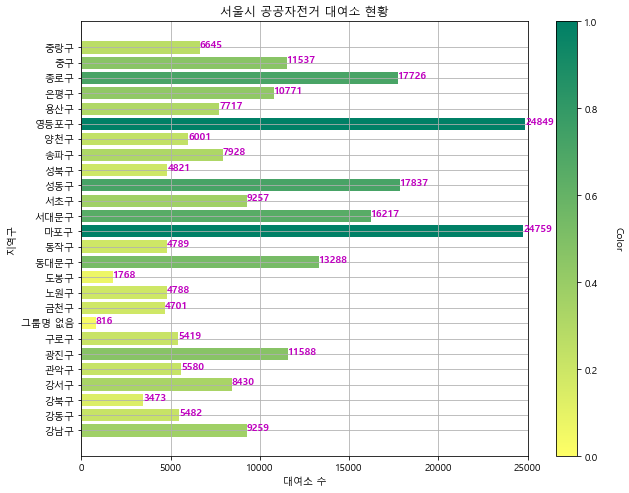

In [175]:
plt.figure(figsize=(10, 8))

x = num_of_rental_place
y = rental_loc

data_color = [ y / max(x) for y in x]

my_cmap = plt.cm.get_cmap('summer_r')
colors = my_cmap(data_color)
plt.barh(y, x, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(data_color)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270, labelpad = 25)

for i, v in enumerate(x):
    plt.text(v + 3 , i, str(v), color='m', fontweight='bold')
    
plt.xlim(0, 25000)
plt.xlabel("대여소 수")
plt.ylabel("지역구")
plt.title("서울시 공공자전거 대여소 현황")
plt.grid()
plt.show()

### 7. 서울시 각 구별 연간 대여횟수 가져오기

In [176]:
num_of_rental_array = np.array(num_of_rental)
sum_of_rental = []
for i in range(len(num_of_rental_array)):
    sum_of_rental.append(np.array(num_of_rental_array[i]).sum())

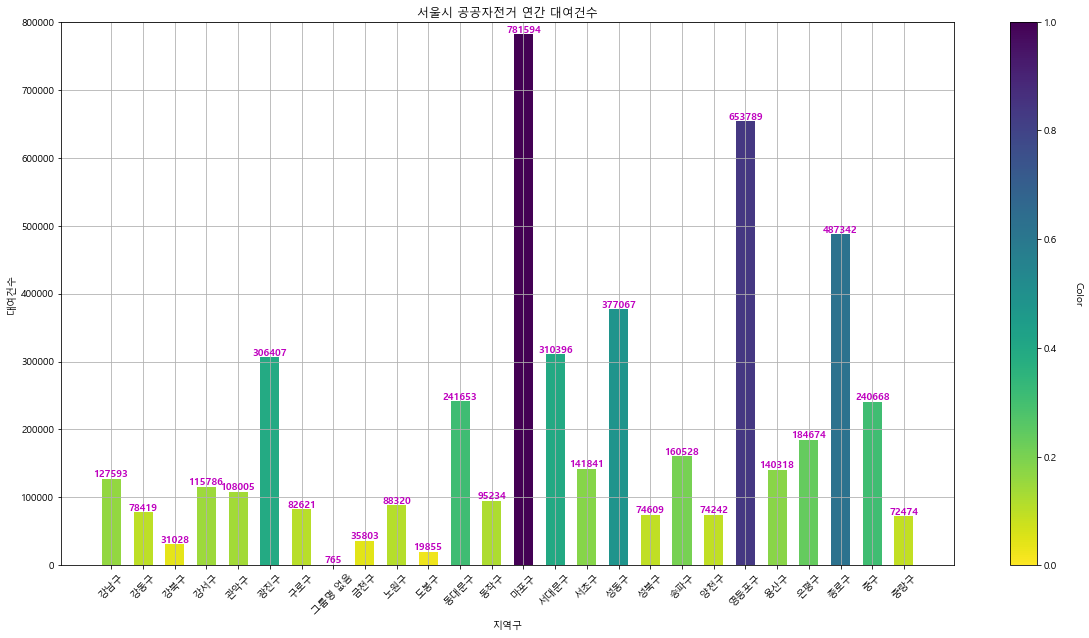

In [177]:
plt.figure(figsize=(20, 10))

x = rental_loc
y = sum_of_rental

data_color = [ x / max(y) for x in y]

my_cmap = plt.cm.get_cmap('viridis_r')
colors = my_cmap(data_color)
bar = plt.bar(x, y, color=colors, width=0.6)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0, max(data_color)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270, labelpad = 25)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), color='m', fontweight='bold', ha='center', va='bottom')
    
plt.ylim(0, 800000)
plt.xlabel("지역구")
plt.ylabel("대여건수")
plt.xticks(rotation=45)
plt.title("서울시 공공자전거 연간 대여건수")
plt.grid()
plt.show()

### 8. 대여소 수 대비 대여건수 비교

In [178]:
x = num_of_rental_place
y = sum_of_rental

In [179]:
fp1 = np.polyfit(x, y, 1)
fp1

array([ 2.94763280e+01, -8.47621461e+04])

In [180]:
f1 = np.poly1d(fp1)
fx = np.linspace(0, 28000, 100) # x축의 범위는 0부터 28000까지, 샘플 데이터 100개

error_range = np.abs(y - f1(x))

df_sort = np.sort(error_range)[::-1] # 오차 내림차순 정렬
df_sort[:5]

array([136551.74145031,  82859.46486317,  65266.30018185,  63940.1162062 ,
        61474.46250351])

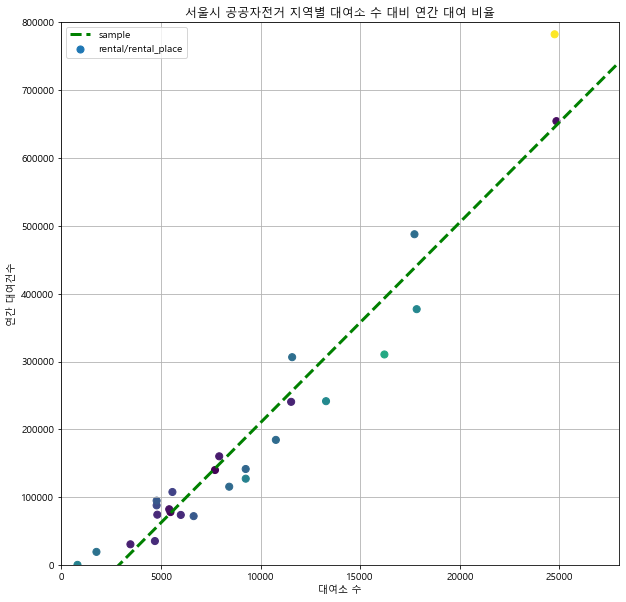

In [181]:
plt.figure(figsize=(10,10))

plt.scatter(x, y, c=error_range, s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.xlim(0, 28000)
plt.ylim(0, 800000)
plt.legend(['sample', 'rental/rental_place'], loc='upper left')
plt.xlabel("대여소 수")
plt.ylabel("연간 대여건수")
plt.title("서울시 공공자전거 지역별 대여소 수 대비 연간 대여 비율")
plt.grid()
plt.show()

### 9. 마포구 연간 대여 추이

In [365]:
mapo_id = 13

In [366]:
rental_date = data_all[1:, 2:3]

In [367]:
num_of_rental_mapo = [[]] * 12

In [382]:
num_of_rental[mapo_id][2]

4

In [376]:
jan = 0
feb = 0
mar = 0
apr = 0
may = 0
jun = 0
jul = 0
aug = 0
sep = 0
oct = 0
nov = 0
dec = 0

In [377]:
k = 0
for i in range(len(rental_loc_list)): # 전체 내역에서
    tmp = str(rental_date[i].tolist())
    tmp_date = re.findall("\d+", tmp) # 정규식 사용하여 월(month) 정보 추출
    date = list(map(int, tmp_date))
    rental_month = date[0] # i번째 대여 달(month)
    rental_location = rental_loc_list[i][0] # i번째 대여 그룹(00구)
    if rental_location == '마포구' and rental_month == 1:
        jan += num_of_rental[mapo_id][k] # 날짜에 따른 마포구 대여소별 대여 건수를 리스트에 추가     
    elif rental_location == '마포구' and rental_month == 2:
        feb += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 3:
        mar += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 4:
        apr += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 5:
        may += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 6:
        jun += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 7:
        jul += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 8:
        aug += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 9:
        sep += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 10:
        oct += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 11:
        nov += num_of_rental[mapo_id][k]
    elif rental_location == '마포구' and rental_month == 12:
        dec += num_of_rental[mapo_id][k]
    k += 1

In [378]:
jan

57820

- 월별 마포구 대여건수 합

In [351]:
sum_of_rental_mapo = []

In [352]:
sum_of_rental_mapo.append(jan)
sum_of_rental_mapo.append(feb)
sum_of_rental_mapo.append(mar)
sum_of_rental_mapo.append(apr)
sum_of_rental_mapo.append(may)
sum_of_rental_mapo.append(jun)
sum_of_rental_mapo.append(jul)
sum_of_rental_mapo.append(aug)
sum_of_rental_mapo.append(sep)
sum_of_rental_mapo.append(oct)
sum_of_rental_mapo.append(nov)
sum_of_rental_mapo.append(dec)
sum_of_rental_mapo

[8228, 7544, 8432, 8156, 8428, 8160, 8148, 8376, 8272, 8556, 8264, 8472]

Text(0.5, 1.0, '월별 마포구 대여 건수')

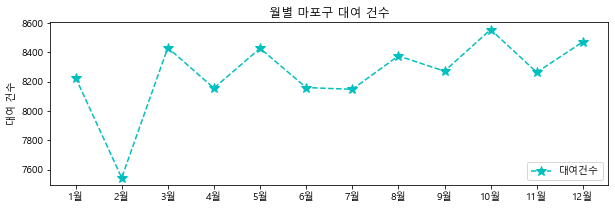

In [353]:
plt.figure(figsize=(10,3))

mon = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
plt.plot(mon, sum_of_rental_mapo, "c*--", markersize = 10, label = "대여건수")
plt.legend(loc=4)
plt.ylabel("대여 건수")
plt.title("월별 마포구 대여 건수")

### 10. 마포구 계절별 대여 비율

In [357]:
season_of_rental_mapo = []
season = ['봄', '여름', '가을', '겨울']

spring = mar + apr + may
summer = jun + jul + aug
autumn = sep + oct + nov
winter = dec + jan + feb

season_of_rental_mapo.append(spring)
season_of_rental_mapo.append(summer)
season_of_rental_mapo.append(autumn)
season_of_rental_mapo.append(winter)

([<matplotlib.patches.Wedge at 0x1f98e4cb198>,
 [Text(0.771450559022336, 0.784132664148182, '봄'),
  Text(-0.7885733921498274, 0.7669106891896309, '여름'),
  Text(-0.7604312381571806, -0.7948234596655647, '가을'),
  Text(0.7904199993413007, -0.765007336331684, '겨울')],
 [Text(0.42079121401218317, 0.42770872589900827, '25.3%'),
  Text(-0.43013094117263306, 0.4183149213761623, '24.9%'),
  Text(-0.4147806753584621, -0.4335400689084898, '25.3%'),
  Text(0.4311381814588912, -0.41727672890819123, '24.5%')])

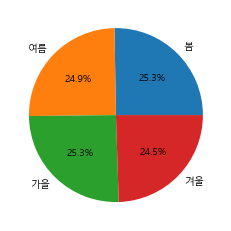

In [383]:
plt.pie(season_of_rental_mapo, labels=season, autopct='%.1f%%')